In [1]:
# pip install librosa
# pip install audiomentations
# pip install pydub

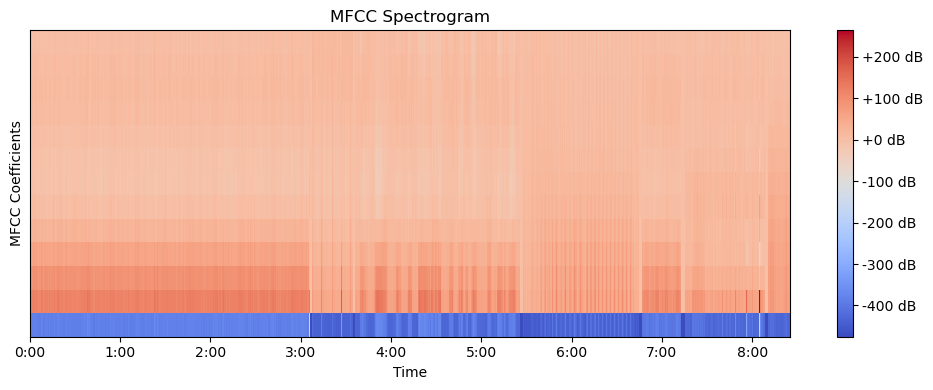

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
file_path = r"C:\Users\User\Desktop\tf\All-Whale.wav"
y, sr = librosa.load(file_path, sr=None)

# Compute the Mel-frequency cepstral coefficients (MFCCs)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Visualize the MFCC spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC Spectrogram')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()


In [3]:
import joblib
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
def load_data(file_path):
    file_path = r"C:\Users\User\Desktop\tf"
    pass


# Function to replace single backslashes with an empty string
def replace_single_backslashes(data):
    return [[item.replace('\\', '') for item in row] for row in data]

# Load and preprocess data
def load_data(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()
        

    data = [line.strip().split('\t') for line in lines]

    # Replace single backslashes with an empty string in the data before creating the DataFrame
    data = replace_single_backslashes(data)

    # Assuming the first line contains column headers
    columns = data[0]
    rows = data[1:]

    df = pd.DataFrame(rows, columns=columns)

    return df

# Usage
df_whale = load_data(r"C:\Users\User\Desktop\tf\Label Whale.txt")
df_non_whale = load_data(r"C:\Users\User\Desktop\tf\Label NON-Whale.txt")

print("Columns in df_whale:", df_whale.columns)
print("Columns in df_non_whale:", df_non_whale.columns)

Columns in df_whale: Index(['0.000000', '0.130985', 'bl1'], dtype='object')
Columns in df_non_whale: Index(['2.986469', '3.877170', 'no1'], dtype='object')


In [5]:
# Add label column to dataframes
df_whale['label'] = 'Whale'
df_non_whale['label'] = 'non Whale'

df_combined = pd.concat([df_whale, df_non_whale], ignore_index=True)

X = df_combined.drop("label", axis=1)
y = df_combined["label"]

# Convert labels using label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert X to numeric values (if needed)
X_numeric = X.apply(pd.to_numeric, errors='coerce')
X_numeric = X_numeric.fillna(0)  # Replace NaN values with 0

X_train, X_temp, y_train_encoded, y_temp_encoded = train_test_split(X_numeric, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val_encoded, y_test_encoded = train_test_split(X_temp, y_temp_encoded, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [6]:
import numpy as np
import audiomentations as AA

In [7]:
from pydub import AudioSegment

# Load your audio file
audio = AudioSegment.from_file(r"C:\Users\User\Desktop\tf\All-Whale.wav")

# Define the number of semitones to shift (positive for up, negative for down)
n_semitones = 2

# Perform pitch shift
shifted_audio = audio._spawn(audio.raw_data, overrides={
    "frame_rate": int(audio.frame_rate * (2 ** (n_semitones / 12.0)))
})

# Export the shifted audio to a new file
shifted_audio.export("shifted_audio.wav", format="wav")


C:\Users\User\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


<_io.BufferedRandom name='shifted_audio.wav'>

In [8]:
from pydub import AudioSegment
import audiomentations as AA
import numpy as np

# Load your audio file
audio = AudioSegment.from_file(r"C:\Users\User\Desktop\tf\All-Whale.wav")

# Define augmentation transforms
augmenter = AA.Compose([
    AA.AddGaussianNoise(p=0.5),  # Add Gaussian noise with 50% probability
    # Add other augmentation transforms here
])

# Convert the audio to numpy array (assuming it's in PCM format)
audio_array = np.array(audio.get_array_of_samples())

# Augment the audio data
augmented_audio_array = augmenter(samples=audio_array, sample_rate=audio.frame_rate)

# Convert the augmented audio array back to an AudioSegment
augmented_audio = AudioSegment(
    augmented_audio_array.tobytes(),
    frame_rate=audio.frame_rate,
    sample_width=augmented_audio_array.dtype.itemsize,
    channels=audio.channels
)

# Specify the export directory and filename
output_path = r"C:\Users\User\Desktop\tf\augmented_audio.wav"

# Export the augmented audio to the specified directory
augmented_audio.export(output_path, format="wav")

print(f"Augmented audio saved to {output_path}")


Augmented audio saved to C:\Users\User\Desktop\tf\augmented_audio.wav


In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the augmented audio
augmented_audio, sr = librosa.load(output_path, sr=None)

# Compute MFCCs for the augmented audio
mfccs_augmented = librosa.feature.mfcc(y=augmented_audio, sr=sr, n_mfcc=13)


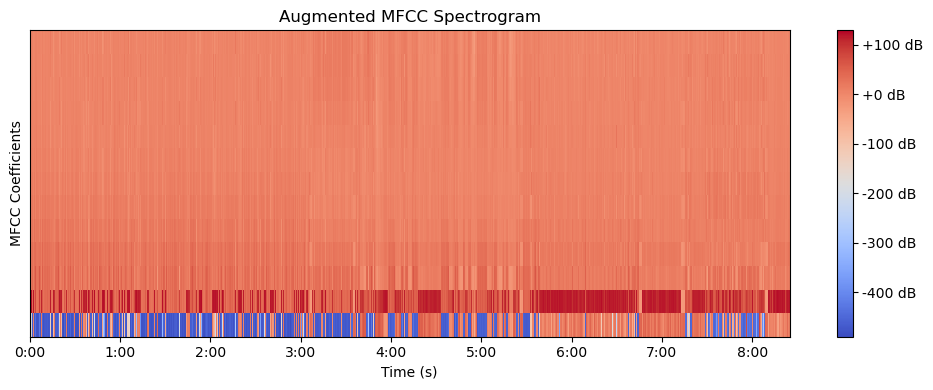

In [10]:
import matplotlib.pyplot as plt
import librosa.display

# Visualize the MFCC spectrogram for augmented audio
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs_augmented, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Augmented MFCC Spectrogram')  # You can adjust this title
plt.xlabel('Time (s)')  # You can adjust the x-axis label
plt.ylabel('MFCC Coefficients')  # You can adjust the y-axis label
plt.tight_layout() 
plt.show()


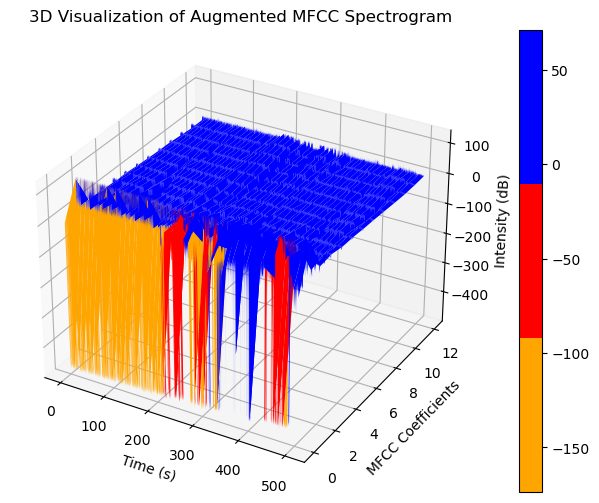

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import librosa.display
import numpy as np
import matplotlib.colors as mcolors

# Create a figure and 3D axes
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for time and MFCC coefficients
time, mfcc_coefficients = np.meshgrid(librosa.times_like(mfccs_augmented), np.arange(13))

# Define a custom colormap with orange, red, and blue
colors = ['#FFA500', '#FF0000', '#0000FF']
cmap = mcolors.ListedColormap(colors)

# Plot the 3D surface with the custom colormap
surf = ax.plot_surface(time, mfcc_coefficients, mfccs_augmented, cmap=cmap)

# Set axis labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('MFCC Coefficients')
ax.set_zlabel('Intensity (dB)')
ax.set_title('3D Visualization of Augmented MFCC Spectrogram')

# Add colorbar
fig.colorbar(surf)

# Show the plot
plt.show()
